In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [4]:
N = 1000
X = np.random.random((N,2))*6-3
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:,1])

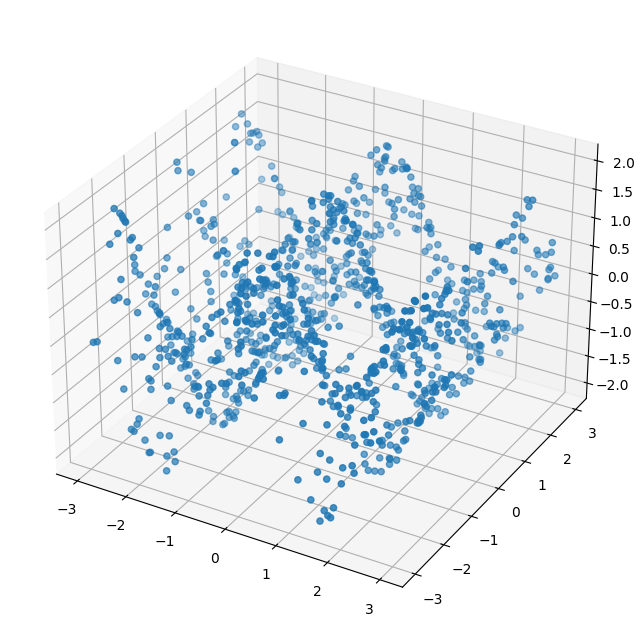

In [6]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

In [7]:
model = SVR(C = 100)
model.fit(X,Y);

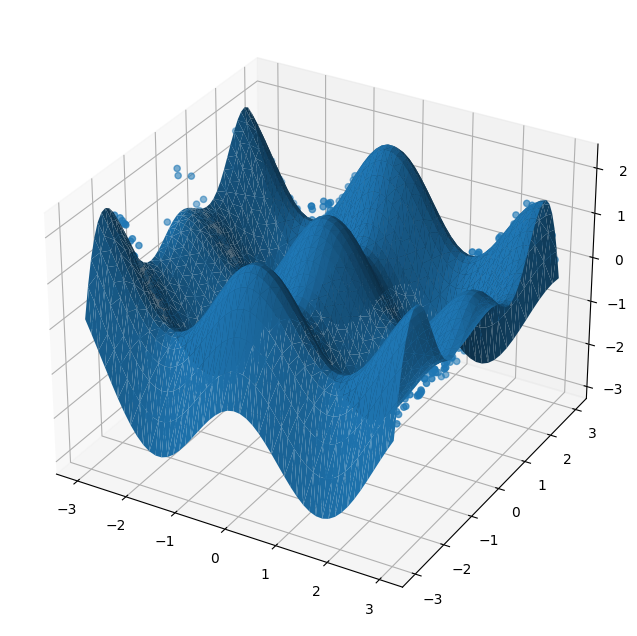

In [12]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:, 1], Y)


line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased = True);

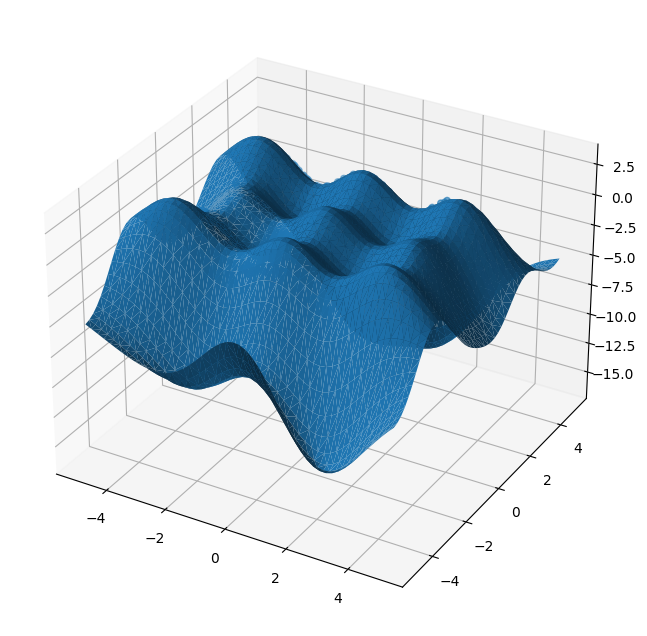

In [13]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:, 1], Y)


line = np.linspace(-5,5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased = True);

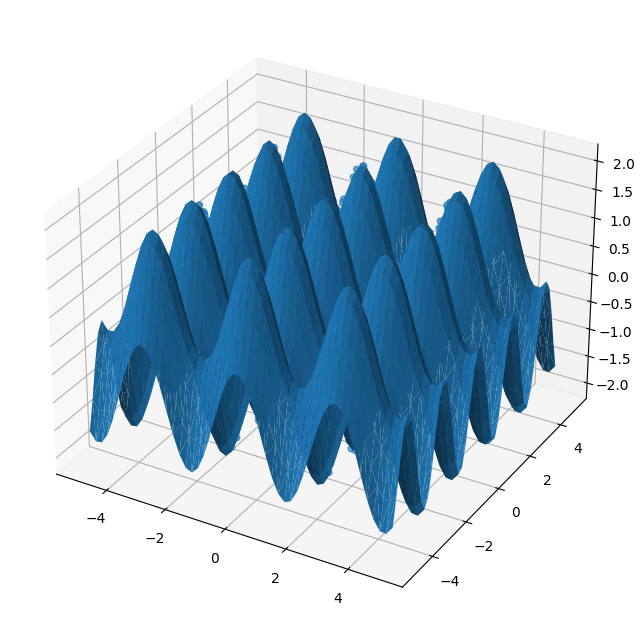

In [15]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:, 1], Y)


line = np.linspace(-5,5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Ytrue = np.cos(2*Xgrid[:, 0]) + np.cos(3*Xgrid[:, 1])
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Ytrue, linewidth = 0.2, antialiased = True);

In [16]:
model = RandomForestRegressor()

In [17]:
model.fit(X,Y);

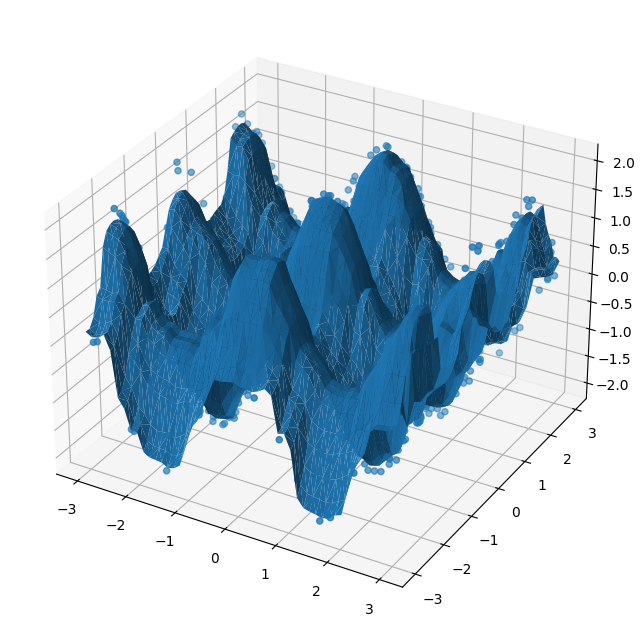

In [18]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:, 1], Y)


line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased = True);

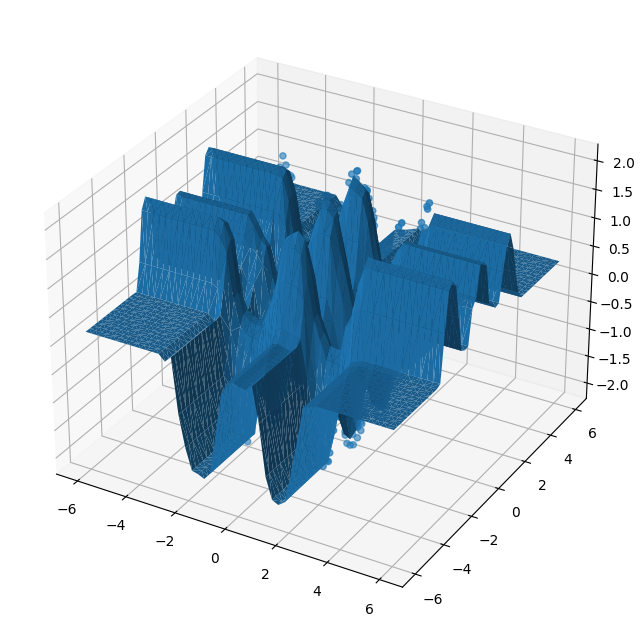

In [19]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:, 1], Y)


line = np.linspace(-6, 6, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased = True);

In [20]:
model = MLPRegressor(hidden_layer_sizes = 128, alpha = 0, learning_rate_init = 0.1)

In [22]:
model.fit(X,Y);

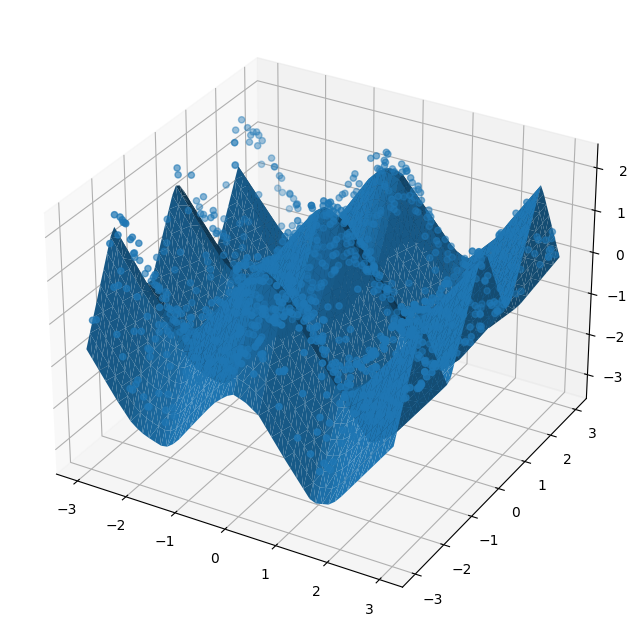

In [23]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:, 1], Y)


line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased = True);

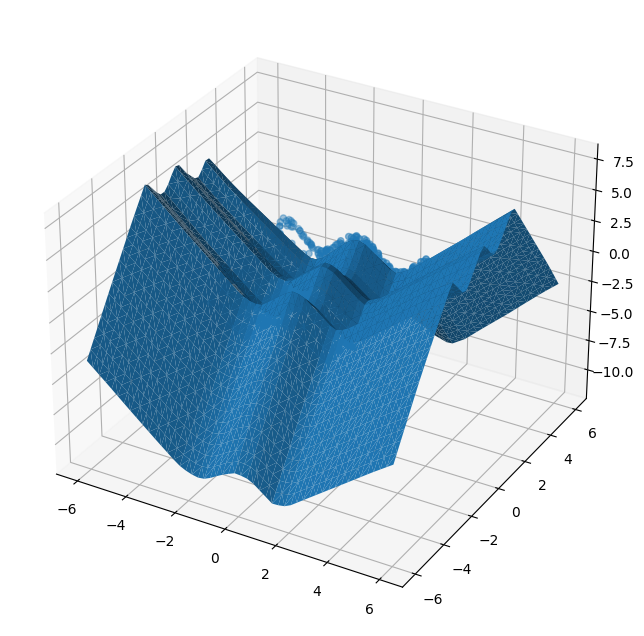

In [24]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:, 1], Y)


line = np.linspace(-6, 6, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased = True);

In [25]:
df = pd.read_csv('SPY.csv', index_col = 'Date', parse_dates = True)

In [27]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [28]:
df.shape

(2263, 6)

In [30]:
train = df.iloc[:2000]['Close'].copy().dropna()
test = df.iloc[2000:]['Close'].copy().dropna()

In [32]:
Xtrain = []

for t in range(len(train)-1):
  x0 = train[t]
  x1 = train[t+1]
  Xtrain.append((x0, x1))



Xtest = []

for t in range(len(test) - 1):
  x1 = test[t]
  x2 = test[t+1]
  Xtest.append((x1, x2))


In [33]:
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

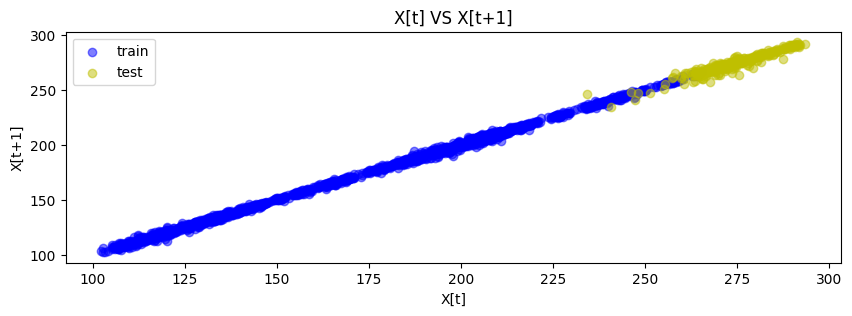

In [35]:
plt.figure(figsize= (10,3))
plt.xlabel('X[t]')
plt.ylabel('X[t+1]')
plt.title('X[t] VS X[t+1]')

plt.scatter(Xtrain[:,0], Xtrain[:,1], c= 'b', alpha = 0.5, label = 'train')
plt.scatter(Xtest[:,0], Xtest[:,1], c = 'y', alpha = 0.5, label = 'test')
plt.legend();